In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, log_loss

In [3]:
dataset = "https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/refs/heads/main/datasets/breast_cancer.csv"

data = pd.read_csv(dataset, index_col=0)

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
ss = StandardScaler()

X_train[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = ss.transform(X_test[X_test.columns])

In [6]:
def fit_classifier(model, batch_size=[16, 32, 64, 128, 256], epochs=100, dataset=None):

    if dataset is None:
        dataset = (X_train, y_train)
        
    log_losses = []
    X, y = dataset

    for bs in batch_size:
        print(f"Training with batch size: {bs}:\n")

        for epoch in range(epochs):
            # Shuffle the training set
            X_train, y_train = shuffle(X, y)

            for i in range(0, len(X_train), bs):

                # Get the current batch
                X_batch = X_train[i:i+bs]
                y_batch = y_train[i:i+bs]

                # Fit the model on the current batch
                model.partial_fit(X_batch, y_batch, classes=np.unique(y_train))

                # Evaluate the model
                y_pred = model.predict(X_test)
                y_proba = model.predict_proba(X_test)

                # Compute the loss and accuracy
                loss = log_loss(y_test, y_proba)
                accuracy = accuracy_score(y_test, y_pred)

                log_losses.append(loss)

                print(f"Epoch: {epoch} - Loss: {loss}, Accuracy: {accuracy}")
                
    return log_losses

In [ ]:
from datetime import datetime

log_losses = []

model = SGDClassifier(loss="log_loss", max_iter=1000, tol=0.001, validation_fraction=0.1, n_iter_no_change=5)

epochs = 100
batch_size = [16, 32, 64, 128, 256]

start_time = datetime.now()

log_losses= fit_classifier(model, dataset=(X_train, y_train))

end_time = datetime.now()
print(f"Training time: {end_time-start_time}")

Training with batch size: 16:

Epoch: 0 - Loss: 1.5042358409255971, Accuracy: 0.93
Epoch: 0 - Loss: 1.602778578206657, Accuracy: 0.95
Epoch: 0 - Loss: 1.6030485213419385, Accuracy: 0.95
Epoch: 0 - Loss: 0.6577600844868138, Accuracy: 0.98
Epoch: 0 - Loss: 0.3636308119455691, Accuracy: 0.99
Epoch: 0 - Loss: 0.36375403480045565, Accuracy: 0.99
Epoch: 0 - Loss: 1.1149380352050215, Accuracy: 0.95
Epoch: 0 - Loss: 1.6770908418036294, Accuracy: 0.94
Epoch: 0 - Loss: 0.7348155694343441, Accuracy: 0.97
Epoch: 0 - Loss: 0.73505841847094, Accuracy: 0.97
Epoch: 0 - Loss: 0.7208865340304383, Accuracy: 0.98
Epoch: 0 - Loss: 0.6991315846893954, Accuracy: 0.97
Epoch: 0 - Loss: 1.0135309882842802, Accuracy: 0.96
Epoch: 0 - Loss: 0.5952442155308859, Accuracy: 0.97
Epoch: 0 - Loss: 0.514774107715769, Accuracy: 0.98
Epoch: 0 - Loss: 0.5087911506013688, Accuracy: 0.98
Epoch: 0 - Loss: 0.608264517415267, Accuracy: 0.98
Epoch: 0 - Loss: 1.0125865766070126, Accuracy: 0.96
Epoch: 0 - Loss: 1.013903454447939, A

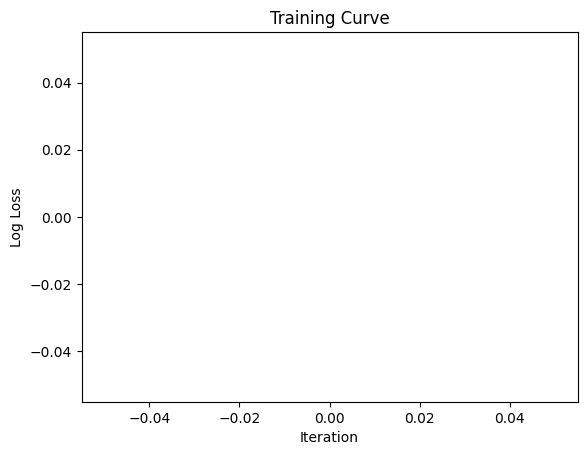

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_curve():

    plt.plot(log_losses)

    plt.xlabel("Iteration")
    plt.ylabel("Log Loss")
    plt.title("Training Curve")

    plt.show()

plot_training_curve()


In [9]:
new_data_csv = "https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/refs/heads/main/datasets/breast_cancer_update.csv"

new_data = pd.read_csv(new_data_csv, index_col=0)

X_new = new_data.drop("diagnosis", axis=1)
y_new = new_data["diagnosis"]

X_new.head(5)

,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,fractal dimension mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worstse,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
ID number,,,,,,,,,,,,,,,,,,,,,
91544001,12.22,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,13.16,24.17,85.13,515.3,0.1402,0.2315,0.3535,0.08088,0.2709,0.08839
91544002,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,0.07976,...,11.69,20.74,76.08,411.1,0.1662,0.2031,0.1256,0.09514,0.2780,0.11680
915452,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,...,17.32,17.76,109.80,928.2,0.1354,0.1361,0.1947,0.13570,0.2300,0.07230
915460,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,...,17.11,36.33,117.70,909.4,0.1732,0.4967,0.5911,0.21630,0.3013,0.10670
91550,11.74,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.02639,0.1499,0.06758,...,12.45,17.60,81.25,473.8,0.1073,0.2793,0.2690,0.10560,0.2604,0.09879


In [10]:
df = pd.concat([data, new_data])

df.head(5)

,diagnosis,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,symmetry mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worstse,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
ID number,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("diagnosis", axis=1), df["diagnosis"], test_size=0.2)

In [12]:
X_train[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = ss.transform(X_test[X_test.columns])

In [15]:
start_time = datetime.now()

log_losses = fit_classifier(model, dataset=(X_train, y_train))

end_time = datetime.now()
print(f"Training time: {end_time-start_time}")

Training with batch size: 16:

Epoch: 0 - Loss: 0.2550997216111168, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.2549393787653675, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.2549301534432553, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.25443991878976546, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.25443295687744666, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.2527587483423384, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.25274933013062784, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.2523702067192224, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.25176030770171576, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.2518752919447294, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.2517746972876358, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.2510248974358859, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.25078761454719656, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.25074405683577883, Accuracy: 0.9469026548672567
Epoch: 0 - Loss: 0.2507218468569168, Ac

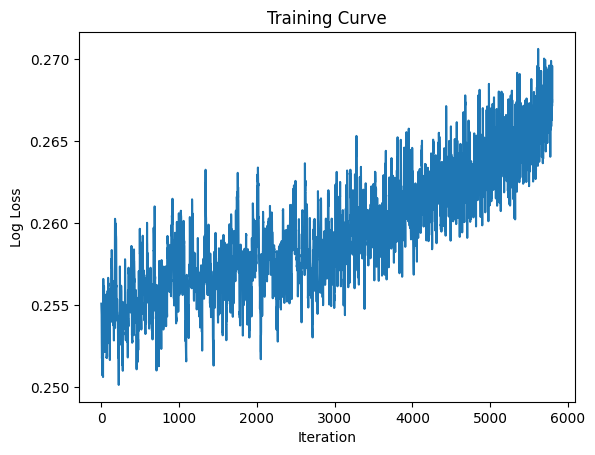

In [16]:
plot_training_curve()